## Additional things to add to Excel-to-Pandas workbook

#### Guy's Notes
1. How do we get the data? Do you want to include the csv file in the repository? It is important to attribute to sources of data and check if you can even distribute it. The reader by this time, should have the knowledge of a few way to get external data, either from API or HTML tables.

    <span style='color:Blue'> Answer: This is only the financial section. there are prior sections, I will send u this week. </span>
 

2. You might want to add a single graph with Pandas built-in visualization and then introduce in a few words the Altair library.

    <span style='color:Blue'> Done  </span>

3. You are mixing between comments in the code and the markdown in the dedicated cells. I prefer to have the markdown cells as the main instructional tools, and only add comments in specific location within the code that need extra explanation. I think it makes it more readable.<br>

    <span style='color:Blue'> Done  </span>


4. You can create mini TOC for your notebook using the titles with headers (#, ##, ###, etc.) It will make it more organized and easy to navigate in the book (check on the right of pages (for example: https://aiola-lab.github.io/from-excel-to-pandas/notebooks/03.01_pivot_tables.html)

    <span style='color:Blue'> Done  </span>

5. In cell 12, I would prefer to use query . It will be cleaner and you don’t need to reset the index and other technical steps. In general, I’m trying to think Zen. How can be show clean and simple flow of the data, with as little as possible “tricks” that people will not remember. The codes in cells 12-15 is a good practice ground to such simplification effort.

    <span style='color:Blue'> Done  </span>


6. In cell 16, I would prefer to use the full precision in the values (without round) and only using style for printing.

    <span style='color:Blue'> Done  </span>


7. In cell 18 (and others), I would prefer to break every instruction to its own line (unless the instruction has no real independent value without the other instructions.

    <span style='color:Blue'> Done  </span>


8. In cell 22, another example to break down a long series of instructions to step-by-step that each is doing another part of the process. If I see each step independently, I can learn to take it and use it in other processes.

    <span style='color:Blue'> Done  </span>


9. In cell 26, another example as above. However, it is also a good time to use the ( … … ) format. I think it makes it much easier to follow and learn the steps.

    <span style='color:Red'> Not sure understood. check with Guy.  </span>


10. In cell 28, which ticker the max value belongs to? Maybe you can use argmin

    <span style='color:Orange'> Changed. make sure is ok with Guy.  </span>



11. The same for cells 30 and 32, the ( and ) at the beginning and end of flow can make it easier to see the pattern.

    <span style='color:Red'> Not sure understood. check with Guy.  </span>
    

12. In cell 35 is a good opportunity to apply style. Please remember that many times the best visualization is a nice table.

    <span style='color:Blue'> Done  </span>


13. In cell 38, again query
14. In cell 39, maybe I missed it, but I didn’t see the explanation for the various formats of :O or :Q in the Altair modifiers. A link to an external source in their documentation can also help.

    <span style='color:Blue'> Done  </span>


15. The comments above repeat in the next cells.

    <span style='color:Blue'> Done  </span>


First of all, import the dataframe.

In [317]:
import pandas as pd
import numpy as np

faang_t = pd.read_csv('faang_t.csv')
faang_t.head(6)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,FB,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
1,GOOG,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2,NFLX,2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
3,AAPL,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.444603,135480400
4,AMZN,2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
5,TSLA,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500


#### Analysis task - General prices trend along the year

The amount of ways possible to analyze this question is major, but we will try to pick a one.

We decided to approach the question with visual structuring of the data.<br>
In order to do that, we will have to use few tools - pandas and a visualisation library to choose.

In [318]:
import os
import sys
!{sys.executable} -m pip install altair
import altair as alt
!{sys.executable} -m pip install vega_datasets
import vega_datasets

First impression will be done using pandas.
Therefore, we will have to move some of our axis to the index.

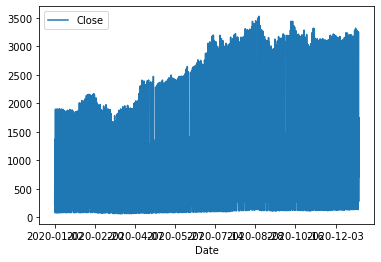

In [319]:
(faang_t.set_index('Date'))[['Symbol', 'Close']].plot()

Not quite there, here we will need to this around using pivot table.<br>
While doing this, the goal would be to achieve column name made out of the Symbols names of the stocks.

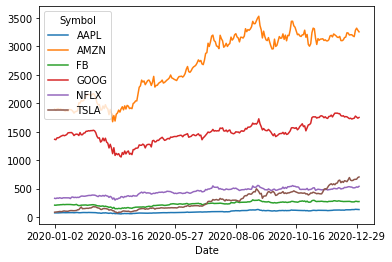

In [320]:
table = pd.pivot_table(faang_t, 
                       values='Adj Close', 
                       index=['Date'],
                       columns=['Symbol'])
table.plot()

Here we are getting a more like it graph, one that shows the price trend for each one of our stocks.<br>
Needles to say it apperance level is low and also customization capabilities.

Now let's try to the same thing using alternative visualization library called Altair.

In [321]:
alt.Chart(faang_t).mark_line().encode(
    x='Date',
    y='Adj Close',
    color='Symbol'
    )

alt.Chart(...)

Can you understand anything?<br> Also, take close look at the X axis. it has too many values and why is that - since the Date column isn't set as DateTime type. Therefore, let's change it.

First of all, let's try to reduce the amount of values on the X axis.<br>
this will be done using pandas.<br>

Also, another option, perhaps the better one, do change define the data as date on Altair.<br>
<br>
First of all, let's make sure our data is considered as a Date

In [322]:
type(faang_t['Date'][0])

str

Shame it's not. let's change it.

In [323]:
import datetime
faang_t['Date'] = (faang_t['Date']
                   .apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d')))

What we done here, is used the datetime library and changed the type of it.<br>
that will help us utilize the dates of the dataframe.<br>

Please also note the format that we used to change it to. needless to say its gonna be YYYY-MM-DD.

Now let's check our 'Date' column data type.

In [324]:
type(faang_t['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [325]:
alt.Chart(faang_t).mark_line().encode(
    x='Date',
    y='Adj Close',
    color='Symbol'
    )

alt.Chart(...)

Noticed how the library can now summrize the dates since it "knows" that this data is date type based.

Also, remember the hack I told you about? Altair also allows you to define str-values in the date format as dates.
It is being done in the following way -

First, in order to truly check it, we will have to change the format of the data back to str.

In [326]:
faang_t['Date'] = faang_t['Date'].apply(lambda x : x.strftime("%m/%d/%Y"))

Side note - 
Watch the diffrence between Str -> Date and Date -> Str; strp or strf and also a bit of symbol.

In [327]:
type(faang_t['Date'][0])

str

First attempt - same result.

In [328]:
alt.Chart(faang_t).mark_line().encode(
    x='Date',
    y='Adj Close',
    color='Symbol'
    )

alt.Chart(...)

Second attempt - Condensed, clearer and we can already smell the money some people cashed out from these investments.<br>
And the code diffrence? just added the ":T" to the right axis, which basically set Altair on Datetime-type mode.

In [329]:
alt.Chart(faang_t).mark_line().encode(
    x='Date:T',
    y='Adj Close',
    color='Symbol'
    )

alt.Chart(...)

#### Analysis task - Which among these five stocks preformed the best and on the other side of the coin, the worst?

OK, so first of all - how are we gonna approach this issue?

I would suggest to check price of stock on the first day of the year and on the last day.<br><br>
Based on those stats, we will calculate the growth each stock did during the last year.<br>
After doing that, we will use those data as our dataframe on a Bar plot.

In [330]:
first_day = ((faang_t[faang_t['Date'] == '01/02/2020'])
                 .reset_index(drop=True))
last_day = ((faang_t[faang_t['Date'] == '12/31/2020'])
                .reset_index(drop=True))

Reducing some of the columns by "drop" some and renaming the rest

In [331]:
last_day = last_day.drop(columns=['Date', 'High', 'Low', 'Adj Close', 'Volume', 'Open', 'Symbol'])
last_day = last_day.rename(columns={'Close' : 'Last Day'})

Now let's merge the two tables, side by side (almost like inner-join), without deleting some of the columns.

In [332]:
first_last_days = (pd.concat([first_day, last_day], axis=1))
first_last_days

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Last Day
0,FB,01/02/2020,206.750000,209.789993,206.270004,209.779999,209.779999,12077100,132.690002
1,GOOG,01/02/2020,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600,540.729980
2,NFLX,01/02/2020,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,3256.929932
3,AAPL,01/02/2020,74.059998,75.150002,73.797501,75.087502,74.444603,135480400,273.160004
4,AMZN,01/02/2020,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,1751.880005
5,TSLA,01/02/2020,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,705.669983


Now let's reduce the amount of columns we have here

In [333]:
first_last_days = first_last_days.drop(columns=['High', 'Low', 'Adj Close', 'Volume', 'Close', 'Date'])
first_last_days

,Symbol,Open,Last Day
0,FB,206.750000,132.690002
1,GOOG,1341.550049,540.729980
2,NFLX,326.100006,3256.929932
3,AAPL,74.059998,273.160004
4,AMZN,1875.000000,1751.880005
5,TSLA,84.900002,705.669983


Renaming the names of the columns in order to avoid confusion.

In [334]:
first_last_days = first_last_days.rename(columns={"Open": "1st Day"})
first_last_days

,Symbol,1st Day,Last Day
0,FB,206.750000,132.690002
1,GOOG,1341.550049,540.729980
2,NFLX,326.100006,3256.929932
3,AAPL,74.059998,273.160004
4,AMZN,1875.000000,1751.880005
5,TSLA,84.900002,705.669983


And for the analysis section - let's comapre prices and get the percent out of it.

In [335]:
first_last_days['Growth'] = first_last_days['Last Day'] / first_last_days['1st Day']
first_last_days

,Symbol,1st Day,Last Day,Growth
0,FB,206.750000,132.690002,0.641790
1,GOOG,1341.550049,540.729980,0.403064
2,NFLX,326.100006,3256.929932,9.987519
3,AAPL,74.059998,273.160004,3.688361
4,AMZN,1875.000000,1751.880005,0.934336
5,TSLA,84.900002,705.669983,8.311778


Round the results to two digits after the dot.

In [436]:
first_last_days = first_last_days.round(2).style
first_last_days

,Symbol,1st Day,Last Day,Growth
2,NFLX,326.100000,3256.930000,9.990000
5,TSLA,84.900000,705.670000,8.310000
3,AAPL,74.060000,273.160000,3.690000
4,AMZN,1875.000000,1751.880000,0.930000
0,FB,206.750000,132.690000,0.640000
1,GOOG,1341.550000,540.730000,0.400000


In [336]:
first_last_days = first_last_days.sort_values(by='Growth', ascending=False)
first_last_days

,Symbol,1st Day,Last Day,Growth
2,NFLX,326.100006,3256.929932,9.987519
5,TSLA,84.900002,705.669983,8.311778
3,AAPL,74.059998,273.160004,3.688361
4,AMZN,1875.000000,1751.880005,0.934336
0,FB,206.750000,132.690002,0.641790
1,GOOG,1341.550049,540.729980,0.403064


As before, let's try doing this also with Pandas, but not only.<br>

##### *Pandas*

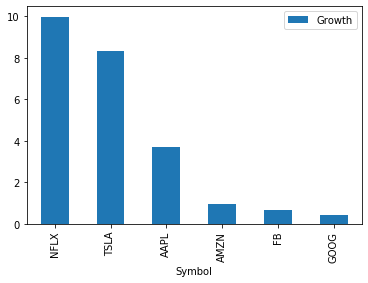

In [337]:
((first_last_days.set_index('Symbol'))
     [['Growth']]
     .plot(kind='bar'))

And now, let's try doing the same thing with Altair

##### *Altair*

In [338]:
alt.Chart(first_last_days, title = 'Growth of FAANG + TSLA stocks 2020').mark_bar().encode(
    x=alt.X('Symbol:N', sort='y'),
    y='Growth:Q'
    ).properties(
    width=300,
    height=250
    )

alt.Chart(...)

So, Did you make good investment decisions on 2020?<br>
(And don't give me the - "I'm here for the long-term")

One more thing, if you have doubted what is the letter 'Q' in the Y column stands for and are there any others, here is the full list:
1. *Quantitative* "Q":	a continuous real-valued quantity
2. *Ordinal* "O":	a discrete ordered quantity
3. *Nominal* "N":	a discrete unordered category
4. *Temporal* "T":	a time or date value
5. *Geojson* "G":	a geographic shape

(https://altair-viz.github.io/user_guide/encoding.html)

#### Analysis task - Let's try to check the voltality of these stocks

And we are gonna to that by comaring the price change along each day of the year for each stock.<br>
Afterwards, we will try to visualise it in a way that will be the most informative.

In [339]:
faang_t['Price Change (%)'] = (faang_t['Close'] / faang_t['Open'] - 1)
faang_t['Price Change (%)'] = faang_t['Price Change (%)'] * 100
faang_t

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Price Change (%)
0,FB,01/02/2020,206.750000,209.789993,206.270004,209.779999,209.779999,12077100,1.465538
1,GOOG,01/02/2020,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600,1.924635
2,NFLX,01/02/2020,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,1.137685
3,AAPL,01/02/2020,74.059998,75.150002,73.797501,75.087502,74.444603,135480400,1.387394
4,AMZN,01/02/2020,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,1.227201
...,...,...,...,...,...,...,...,...,...
1513,NFLX,12/31/2020,525.530029,545.500000,523.150024,540.729980,540.729980,5388800,2.892309
1514,AMZN,12/31/2020,3275.000000,3282.919922,3241.199951,3256.929932,3256.929932,2954100,-0.551758
1515,FB,12/31/2020,272.000000,277.089996,269.809998,273.160004,273.160004,12892900,0.426472
1516,GOOG,12/31/2020,1735.420044,1758.930054,1735.420044,1751.880005,1751.880005,1011900,0.948471


In this visualization example and on, we will be using Altair only.<br>
Why is that - as the visualization's keeps getting more complicated, it gets more code to do these in Pandas, and less on Altair.

In [340]:
alt.Chart(faang_t).mark_circle().encode(
    x='Date:T',
    y='Price Change (%)',
    color='Symbol')

alt.Chart(...)

And let's even make it interactive, which means including the ability to change the scale of the plot by zooming in & out.

In [341]:
alt.Chart(faang_t).mark_circle().encode(
    x='Date:T',
    y='Price Change (%)',
    color='Symbol',
    tooltip=['Date:T', 'Symbol' ,'Price Change (%)']
    ).interactive()

alt.Chart(...)

*Try to drag and also zoom in & out the cursor along the plot*

What do you say? informative enought?<br>
Can you tell which stock was the most voltaile? Perhaps, but barely.

Let's fix it.

In [342]:
chart = alt.Chart(faang_t).mark_circle().encode(
    x='Date:T',
    y='Price Change (%)',
    color='Symbol'
    ).properties(
    width=800,
    height=450
    )

chart = chart + chart.transform_loess('Date', 'Price Change (%)', groupby=['Symbol']).mark_line(size=2)

chart.interactive()

alt.LayerChart(...)

What do you thing? I would say there are just too many dots. <br>
Let's try to check it by the week to reduce its amount.

Here we used the datetime moudle again; but.... did it work? no. why? since our data type is not a date.

In [343]:
faang_t['Week_Number'] = faang_t['Date'].datetime.week

AttributeError: 'Series' object has no attribute 'datetime'

Now please, change it so we can continue with the analysis

In [344]:
# Enter your code here.


# Just saying, we have already converted our Date column once along this excresice. 

And here you can find another example of how to convert

In [345]:
faang_t['Date'] = (faang_t['Date']
                   .apply(lambda x : pd.to_datetime(x)))

Now let's try to convert into weeks

In [346]:
faang_t['Week_Number'] = faang_t['Date'].dt.strftime('%U')
faang_t.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Price Change (%),Week_Number
0,FB,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100,1.465538,00
1,GOOG,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600,1.924635,00
2,NFLX,2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,1.137685,00
3,AAPL,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.444603,135480400,1.387394,00
4,AMZN,2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,1.227201,00


Did you notice that? If we will plot it this way, we will still get the same amount of points.<br>
Therefore we are gonna groupby some of needed columns and only then, plot it.

In [347]:
temp_faang_t = faang_t.groupby(['Symbol', 'Week_Number']).mean().reset_index()

In [348]:
chart = alt.Chart(temp_faang_t).mark_circle().encode(
    x='Week_Number:Q',
    y='Price Change (%)',
    color='Symbol'
    ).properties(
    width=800,
    height=450
    )

chart = chart + chart.transform_loess('Week_Number', 'Price Change (%)', groupby=['Symbol']).mark_line(size=2)

chart.interactive()

alt.LayerChart(...)

Now it looks better. <br>
So, Which stock was the most voltaile this year? TSLA.<br>
Was it worth it for the investors? According to the last day of the year - YES.<br>

And needless to say, this is not a buying recommandation.

#### Analysis task - Simple extractions from the database

Here we will try to get the answers for some simple questions we might have.

Whats is the highest price change that was during 2020?

In [349]:
# Unfinished note (cell 26)
(faang_t[['Symbol', 'Price Change (%)']]
     [faang_t['Price Change (%)']==faang_t['Price Change (%)']
     .max()])

,Symbol,Price Change (%)
127,TSLA,15.780249


And the lowest? Take a guess

In [350]:
# Enter your code here


What are the are the top 5 dates with the highest volume and which stocks were traded?

In [351]:
# Unfinished note (cell 28)
(faang_t[['Date', 'Symbol' ,'Volume']]
             .nlargest(5, columns='Volume'))

,Date,Symbol,Volume
239,2020-02-28,AAPL,426884800
292,2020-03-12,AAPL,418474000
325,2020-03-20,AAPL,401693200
881,2020-07-31,AAPL,374336800
294,2020-03-13,AAPL,370732000


And lowest?

In [352]:
# Enter your code here


In case you wondered

In [353]:
# Unfinished note (cell 30)
(faang_t[['Date', 'Symbol' ,'Volume']]
             .nsmallest(5, columns='Volume'))

,Date,Symbol,Volume
1493,2020-12-24,GOOG,346800
1377,2020-11-27,GOOG,884900
178,2020-02-13,GOOG,929500
834,2020-07-22,GOOG,932000
1479,2020-12-22,GOOG,936700


What is the average daily price change along the year?

In [354]:
faang_t[['Price Change (%)']].mean()

Price Change (%)    0.163475
dtype: float64

What is the median daily price change along the year?

In [355]:
# Unfinished note (cell 32)
faang_t[['Price Change (%)']].median()

Price Change (%)    0.128376
dtype: float64

And what about the average of each stock?<br>
Any guesses of how do to that?<br>
Let's try the Group by.

In [356]:
faang_t.groupby(['Symbol'])['Price Change (%)'].mean()

Symbol
AAPL    0.153979
AMZN    0.056125
FB      0.124095
GOOG    0.147050
NFLX    0.200851
TSLA    0.298749
Name: Price Change (%), dtype: float64

And again, just take a look at the numbers, even if your not a stocks guy. that insane!

##### Analysis task - Let's check how each one of the stocks acted on March's dump

So we are gonna filter the dataframe so we will have only the March dates and then visualise it.

In [357]:
faang_t['Month'] = faang_t['Date'].apply(lambda x : x.month)
faang_t.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Price Change (%),Week_Number,Month
0,FB,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100,1.465538,00,1
1,GOOG,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600,1.924635,00,1
2,NFLX,2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,1.137685,00,1
3,AAPL,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.444603,135480400,1.387394,00,1
4,AMZN,2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,1.227201,00,1


In [434]:
march_faang_t = faang_t[faang_t.Month == 3]

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Price Change (%),Week_Number,Month
240,FB,2020-03-02,194.029999,196.570007,188.850006,196.440002,196.440002,24949000,1.242078,09,3
241,GOOG,2020-03-02,1351.609985,1390.869995,1326.814941,1389.109985,1389.109985,2431500,2.774469,09,3
242,AAPL,2020-03-02,70.570000,75.360001,69.430000,74.702499,74.238663,341397200,5.855886,09,3
243,TSLA,2020-03-02,142.251999,148.738007,137.334000,148.723999,148.723999,100975000,4.549672,09,3
244,AMZN,2020-03-02,1906.489990,1954.510010,1870.000000,1953.949951,1953.949951,6761700,2.489389,09,3
...,...,...,...,...,...,...,...,...,...,...,...
367,NFLX,2020-03-31,367.929993,383.010010,366.440002,375.500000,375.500000,9366500,2.057459,13,3
368,TSLA,2020-03-31,100.250000,108.592003,99.400002,104.800003,104.800003,88857500,4.538656,13,3
369,FB,2020-03-31,165.479996,170.929993,164.199997,166.800003,166.800003,23676300,0.797684,13,3
370,AAPL,2020-03-31,63.900002,65.622498,63.000000,63.572498,63.177769,197002000,-0.512526,13,3


In [407]:
march_faang_t['Price Change (%)']

0      1.242078
1      2.774469
2      5.855886
3      4.549672
4      2.489389
         ...   
127    2.057459
128    4.538656
129    0.797684
130   -0.512526
131    1.351870
Name: Price Change (%), Length: 132, dtype: float64

Now let's check if there was major loses, based on the table itself.

In [423]:
(march_faang_t[['Price Change (%)']]
     .style
     .apply(lambda x: ["background: red" if v < 0 else "" for v in x], axis = 1))

,Price Change (%)
0,1.242078
1,2.774469
2,5.855886
3,4.549672
4,2.489389
5,2.128060
6,-7.390059
7,-3.360383
8,-3.217597
9,-5.264500


And now for the visualization of the voltality

In [39]:
alt.Chart(march_faang_t).mark_bar().encode(
    x='Date:O',
    y='mean(Price Change (%)):Q',
    color='Symbol:N',
    )

alt.Chart(...)

So what do you say? which stock caused its investors the highest stress levels?

#### Talking about investment of the year, Let's check our old friend, the Bitcoin.

And for those of you who havn't heard about it, you are more the recommanded to watch this video -
https://youtu.be/Cpj_P4Dp5kU<br>
Anyway, back to our business.<br>
In this case, we will use an API provided by one of the biggest site for finances.<br>

(And if you ever wondered, API stands for application programming interface)<br>

In [40]:
import os
import sys
!{sys.executable} -m pip install -- pathlib
!{sys.executable} -m pip install -- yfinance

In [41]:
import numpy as np
import pandas as pd
from pathlib import Path
import yfinance as yf

A function used to pull the most updated data from Yahoo Finance.<br>
Be sure, it is always updated and everytime you will run the function, you will get the latest data outthere!

Net parameter is referred to the symbol of the stock we are analyzing.

In [42]:
def dataframe_pull(net):
    net = yf.Ticker(net)
        
    # Set the timeframe you are interested in viewing.
    net_historical = net.history(start="2015-01-01", interval="1d")
    
    temp_df = net_historical
    return (temp_df)

In [233]:
dataframe_pull('MCD')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,79.957004,80.696012,79.039622,79.218002,6019700,0.0,0
2015-01-05,79.251970,79.574752,78.334582,78.343079,6211900,0.0,0
2015-01-06,78.716847,79.685199,78.045795,78.487503,6484100,0.0,0
2015-01-07,79.217991,79.889042,78.878217,79.855064,6400300,0.0,0
2015-01-08,80.041943,80.679017,79.889045,80.152367,5476700,0.0,0
...,...,...,...,...,...,...,...
2021-01-12,213.690002,214.330002,210.940002,211.600006,2952000,0.0,0
2021-01-13,210.910004,213.130005,210.899994,212.089996,2069800,0.0,0
2021-01-14,212.100006,212.669998,208.000000,208.500000,3666700,0.0,0


 And there you go. You have just pulled a complete price analysis, which will update by the running.

Now that we have the tool used to pull financial data, let's put it into work by doing a Dividends Analysis.<br><br>
And for those of you who doesn't know what that is, this basically a payment the company pays to its shareholders.<br>most of the times, this payment happens on a quarterly basis, while the four quarters payment resolve in the yield on the dividend from the stock.

First of all let's pick a stock to analysis.
And because its almost lunch time, I'll go with Mcdonalds, although I never eat there.

In [44]:
Symbol = 'MCD'

MCD_df = dataframe_pull('MCD')
MCD_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,79.957004,80.696012,79.039622,79.218002,6019700,0.0,0
2015-01-05,79.251970,79.574752,78.334582,78.343079,6211900,0.0,0
2015-01-06,78.716847,79.685199,78.045795,78.487503,6484100,0.0,0
2015-01-07,79.217991,79.889042,78.878217,79.855064,6400300,0.0,0
2015-01-08,80.041943,80.679017,79.889045,80.152367,5476700,0.0,0


First of all, since its a dividends analysis, let's see what is the dividends quarterly approx. payment date.<br>
So first let's understand what are the payments values.

In [45]:
divs_list = MCD_df['Dividends'].unique()
divs_list

array([0.  , 0.85, 0.89, 0.94, 1.01, 1.16, 1.25, 1.29])

And then, discard, based on the values we just found, of the unneeded lines.

In [46]:
MCD_df = MCD_df.loc[MCD_df['Dividends'].isin(divs_list)]
MCD_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,79.957004,80.696012,79.039622,79.218002,6019700,0.0,0
2015-01-05,79.251970,79.574752,78.334582,78.343079,6211900,0.0,0
2015-01-06,78.716847,79.685199,78.045795,78.487503,6484100,0.0,0
2015-01-07,79.217991,79.889042,78.878217,79.855064,6400300,0.0,0
2015-01-08,80.041943,80.679017,79.889045,80.152367,5476700,0.0,0
...,...,...,...,...,...,...,...
2021-01-08,212.899994,216.119995,212.229996,215.869995,2639100,0.0,0
2021-01-11,215.089996,216.119995,213.119995,214.229996,2545900,0.0,0
2021-01-12,213.690002,214.330002,210.940002,211.600006,2952000,0.0,0


Any diffrence? And why is that?<br>
That's right, because we left the obvious value of zero in the array we just filtered by.

So let's get rid of it please.

Also, wondering what is the common way of checking those filter and reducing actions?<br>
Try .Shape . it gives you the dimentions of the plot, which in its turn help you better understand its status, without taking too much effort.

In [47]:
MCD_df.shape

(1520, 7)

Getting all the dates of the dividend payment.

In [48]:
divs_list = pd.DataFrame(divs_list)
divs_list = ((divs_list[0].loc[divs_list[0] != 0])
             .to_numpy())
divs_list

array([0.85, 0.89, 0.94, 1.01, 1.16, 1.25, 1.29])

In [49]:
MCD_df = ((MCD_df.loc[MCD_df['Dividends'].isin(divs_list)])
          .reset_index())
MCD_df.shape

(24, 7)

Based on the values of the shape method we just applied, we can be certain our filter was a sucsses.

First thing first, let's check the dividend yield, as of each quarter and year.

In [51]:
MCD_df['Quarter Yield'] = round((MCD_df['Dividends'] / MCD_df['Close']) * 100, 2)
MCD_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Quarter Yield
0,2015-02-26,83.479332,85.578522,83.110902,85.261505,16098800,0.85,0,1.00
1,2015-05-28,84.697430,84.878924,83.141760,83.383759,10204000,0.85,0,1.02
2,2015-08-28,83.743475,84.275318,83.516786,83.917847,5606000,0.85,0,1.01
3,2015-11-27,99.918105,100.515628,99.759937,100.375038,2763700,0.89,0,0.89
4,2016-02-26,104.455557,104.712307,102.853038,103.641014,5193700,0.89,0,0.86


Now let's try to find the yearly yield.

In [53]:
MCD_df['Year'] = MCD_df['Date'].apply(lambda x : x.year)
yearly_dividends = ((pd.DataFrame(
    MCD_df.groupby(['Year'])['Dividends'].sum()))
                    .reset_index()
                   )
yearly_dividends

,Year,Dividends
0,2015,3.44
1,2016,3.61
2,2017,3.83
3,2018,4.19
4,2019,4.73
5,2020,5.04


Now let's merge the two tables, based on a mutual value.

In [258]:
MCD_df = pd.merge(MCD_df,
          yearly_dividends,
          on ='Year',
          how ='inner')
MCD_df.head()

,Date,Open,High,Low,Close,Volume,Dividends_x,Stock Splits,Quarter Yield,Year,Dividends_y,Dividends
0,2015-02-26,83.479332,85.578522,83.110902,85.261505,16098800,0.85,0,1.00,2015,3.44,3.44
1,2015-05-28,84.697430,84.878924,83.141760,83.383759,10204000,0.85,0,1.02,2015,3.44,3.44
2,2015-08-28,83.743475,84.275318,83.516786,83.917847,5606000,0.85,0,1.01,2015,3.44,3.44
3,2015-11-27,99.918105,100.515628,99.759937,100.375038,2763700,0.89,0,0.89,2015,3.44,3.44
4,2016-02-26,104.455557,104.712307,102.853038,103.641014,5193700,0.89,0,0.86,2016,3.61,3.61


Now let's try filter it by the last dividend payment.<br>
Can you think of an easy way of doing this?
Look closely at the data and decide.

I would try to filter the Dataframe by months, and then choose only the the months of Q4, the div. increase month.

In [55]:
div_yield_MCD_df = (MCD_df[['Date', 'Close', 'Dividends_y']].
                    loc[(MCD_df['Date'].apply(lambda x : x.month).isin([10, 11, 12]))])
div_yield_MCD_df

,Date,Close,Dividends_y
3,2015-11-27,100.375038,3.44
7,2016-11-29,109.311378,3.61
11,2017-11-30,159.783508,3.83
15,2018-11-30,179.587158,4.19
19,2019-11-29,189.746002,4.73
23,2020-11-30,217.440002,5.04


In [56]:
div_yield_MCD_df['Yield'] = (div_yield_MCD_df['Dividends_y'] / div_yield_MCD_df['Close'])
div_yield_MCD_df.head()

,Date,Close,Dividends_y,Yield
3,2015-11-27,100.375038,3.44,0.034271
7,2016-11-29,109.311378,3.61,0.033025
11,2017-11-30,159.783508,3.83,0.023970
15,2018-11-30,179.587158,4.19,0.023331
19,2019-11-29,189.746002,4.73,0.024928


Now let's convert our value to %

In [57]:
div_yield_MCD_df['Yield_%'] = div_yield_MCD_df['Yield'].map(lambda n: '{:,.2%}'.format(n))
div_yield_MCD_df['Yield'] = (div_yield_MCD_df['Yield'] * 100)
div_yield_MCD_df.head()

,Date,Close,Dividends_y,Yield,Yield_%
3,2015-11-27,100.375038,3.44,3.427147,3.43%
7,2016-11-29,109.311378,3.61,3.302492,3.30%
11,2017-11-30,159.783508,3.83,2.396993,2.40%
15,2018-11-30,179.587158,4.19,2.333129,2.33%
19,2019-11-29,189.746002,4.73,2.492806,2.49%


In [58]:
import altair as alt

base = alt.Chart(div_yield_MCD_df, title = f"Yield from Dividends for {Symbol} Stock").mark_area(
    color='goldenrod',
    opacity=0.3
).encode(
    x='yearmonth(Date):T',
    y='Yield:Q',
)
brush = alt.selection_interval(encodings=['x'],empty='all')
background = base.add_selection(brush)
selected = base.transform_filter(brush).mark_area(color='goldenrod')

background + selected

alt.LayerChart(...)

#### Analysis Task - Let's try to understand by how much did MCD raised their Dividend (%) each Year

First of all, let's try to get the only unique values of each year, dividends wise.<br>
This will be done by dividing them into two, in order to later on compare between them.

In [59]:
low_MCD_df = pd.DataFrame(MCD_df.groupby(['Year'])['Dividends_x'].nsmallest(1).reset_index())
low_MCD_df = low_MCD_df.drop(columns=['level_1'])
low_MCD_df

,Year,Dividends_x
0,2015,0.85
1,2016,0.89
2,2017,0.94
3,2018,1.01
4,2019,1.16
5,2020,1.25


In [60]:
high_MCD_df = pd.DataFrame(
                            MCD_df.groupby(['Year'])['Dividends_x'].nlargest(1)
                           .reset_index())
high_MCD_df = high_MCD_df.drop(columns=['level_1'])
high_MCD_df

,Year,Dividends_x
0,2015,0.89
1,2016,0.94
2,2017,1.01
3,2018,1.16
4,2019,1.25
5,2020,1.29


Now we will merge the two tables.

In [61]:
div_growth_MCD_df = pd.merge(low_MCD_df,
          high_MCD_df,
          on ='Year',
          how ='inner')
div_growth_MCD_df

,Year,Dividends_x_x,Dividends_x_y
0,2015,0.85,0.89
1,2016,0.89,0.94
2,2017,0.94,1.01
3,2018,1.01,1.16
4,2019,1.16,1.25
5,2020,1.25,1.29


In [62]:
div_growth_MCD_df['Div Growth (%)'] =  round((div_growth_MCD_df['Dividends_x_y'] / div_growth_MCD_df['Dividends_x_x']) - 1, 2)
div_growth_MCD_df

,Year,Dividends_x_x,Dividends_x_y,Div Growth (%)
0,2015,0.85,0.89,0.05
1,2016,0.89,0.94,0.06
2,2017,0.94,1.01,0.07
3,2018,1.01,1.16,0.15
4,2019,1.16,1.25,0.08
5,2020,1.25,1.29,0.03


In [63]:
div_growth_MCD_df['Div Growth ($)'] =  (div_growth_MCD_df['Dividends_x_y'] - div_growth_MCD_df['Dividends_x_x'])
div_growth_MCD_df

,Year,Dividends_x_x,Dividends_x_y,Div Growth (%),Div Growth ($)
0,2015,0.85,0.89,0.05,0.04
1,2016,0.89,0.94,0.06,0.05
2,2017,0.94,1.01,0.07,0.07
3,2018,1.01,1.16,0.15,0.15
4,2019,1.16,1.25,0.08,0.09
5,2020,1.25,1.29,0.03,0.04


In [64]:

line1 = alt.Chart(div_growth_MCD_df, title = f"Div Payment ($) for {Symbol}").mark_line().encode(
    alt.X('Year:O'),
    alt.Y('Dividends_x_x:Q', title = 'Dividends Payment ($)' ,axis=alt.Axis(format='$'), scale=alt.Scale(domain=(0.4, 1.8)))
    ).properties(
    height=300,
    width = 150)

line2 = alt.Chart(div_growth_MCD_df, title = f"Div Growth (%) for {Symbol}").mark_line(color='#e68a00').encode(
    alt.X('Year:O'),
    alt.Y('Div Growth (%):Q', axis=alt.Axis(format='%')),
    ).properties(
    height=300,
    width = 150)


line1 | line2

alt.HConcatChart(...)

Wondering what is the reason for the spike? Same here.<br>
One good reason could be that the stock has been splitted.<br><br>
One way of doing this would be to check all the values on the 'Stock Splits' column.<br>
In that case, if we would get only one type of values (the value 0 - no split), then it means no split was conducted.

In [122]:
if_split = (len((MCD_df['Stock Splits']
                 .unique())
                .tolist()))

1

Want also to communicate it back to the user?<br>
Let's try to use the f" " in prior to the string conducted and with {} brackets for the parameter.

In [66]:
if if_split == 1:
    print("Stock has not been throught split within the years analyzed.")
else:
    print(f"Stock has been splited {if_split - 1} times, within the years analyzed.")

Stock has not been throught split within the years analyzed.
